# Fit a Michaëlis-Menten kinetic

Let's fit a model coming from the physical chemistry field with real data.

## Select model

We select a homegeneous catalysis solver:

In [1]:
import numpy as np
from scifit.solvers.scientific import MichaelisMentenKineticFitSolver

Now create a new solver instance:

In [2]:
solver = MichaelisMentenKineticFitSolver()

## Load data

We create some syntehtic dataset:

In [3]:
data = solver.synthetic_dataset(
    xmin=0.0, xmax=2000.0, dimension=1, resolution=50,
    parameters=[3.71e-2, 1.49e2],
    sigma=0.025, scale_mode="rel", seed=7890,
)

In [4]:
solver.dump("data/MichaelisMentenKinetic.csv", data=data)

## Solve Fit

Everything is setup, we can solve our problem:

In [5]:
solution = solver.fit(data, p0=[1e-2, 1e2])

In [6]:
solver.solved()

True

In [7]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [8]:
print(solution["parameters"])

[3.71320864e-02 1.51227211e+02]


In [9]:
print(np.diag(solution["covariance"]))

[4.44236540e-08 1.21697686e+01]


As we can see, parameters have been properly regressed.

## Render solution

Finally we can render fit and loss function to check the dynamic:

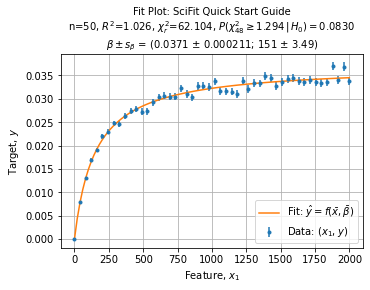

In [10]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

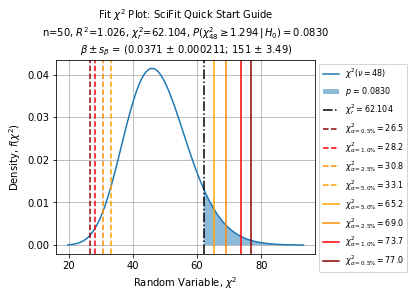

In [11]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

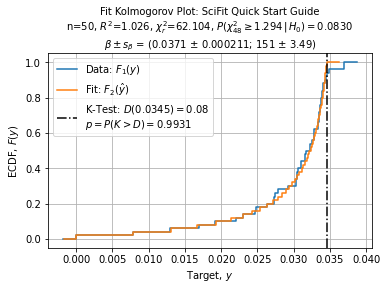

In [12]:
axe = solver.plot_kolmogorov(title="SciFit Quick Start Guide")

In [13]:
solver.parameter_domains()

,0,1
min,0.018566,75.613605
max,0.055698,226.840816


In [14]:
solver.parameter_domains()

,0,1
min,0.018566,75.613605
max,0.055698,226.840816


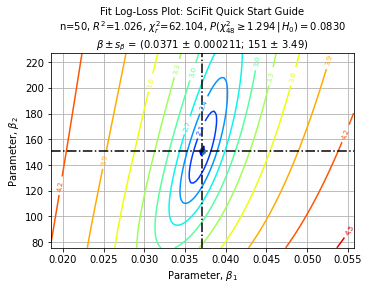

In [15]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=120,
    log_loss=True
)

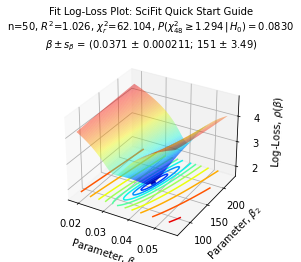

In [16]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=120,
    surface=True, log_loss=True
)